In [2]:
import pandas as pd
import os

In [3]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('./sales_data/') if file.endswith('.csv')]

df = pd.read_csv('./sales_data/' + file)
all_months_data = pd.concat([all_months_data, df])

print(all_months_data.head())

NameError: name 'file' is not defined

In [4]:
# Get a list of CSV files in the 'sales_data' directory
files = [file for file in os.listdir('./sales_data/') if file.endswith('.csv')]

# Initialize an empty DataFrame to store all the data
all_months_data = pd.DataFrame()

# Loop through the files and concatenate them
for file in files:
    df = pd.read_csv("sales_data/" + file)  # Make sure to include the directory separator "/"
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)

# Save the concatenated data to a new CSV file
all_months_data.to_csv("all_data.csv", index=False)


In [5]:
all_data = pd.read_csv("all_data.csv")


all_data.head()

Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301

## Clean up the data

### Drop rows of NAN

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

all_data = all_data.dropna(how='all')
all_data.head()

Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301

#### Find 'Or' and delete it

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct type

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

### Augment data with additional columns

#### Task 2: Add Month Column

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month  
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12  
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12

### Add a sales column

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month    Sales  
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12  1700.00  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12   600.00  
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12    11.95  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12   149.99  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12    11.95

### Question1: What was the best month for sales? How much was earned that month?

In [11]:
results = all_data.groupby('Month').sum
results

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x11aa8e910>>

In [14]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()


TypeError: 'method' object is not subscriptable

#### Question 2: What city had the highest number of sales?

#### Task 4: Add a city column

In [13]:
# let's use.apply()
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

all_data

Order ID                 Product  Quantity Ordered  Price Each  \
0        295665      Macbook Pro Laptop                 1     1700.00   
1        295666      LG Washing Machine                 1      600.00   
2        295667    USB-C Charging Cable                 1       11.95   
3        295668        27in FHD Monitor                 1      149.99   
4        295669    USB-C Charging Cable                 1       11.95   
...         ...                     ...               ...         ...   
186845   222905  AAA Batteries (4-pack)                 1        2.99   
186846   222906        27in FHD Monitor                 1      149.99   
186847   222907    USB-C Charging Cable                 1       11.95   
186848   222908    USB-C Charging Cable                 1       11.95   
186849   222909  AAA Batteries (4-pack)                 1        2.99   

            Order Date                        Purchase Address  Month  \
0       12/30/19 00:01  136 Church St, New York City, NY 10001     12   
1       12/29/19 07:03     562 2nd St, New York City, NY 10001     12   
2       12/12/19 18:21    277 Main St, New York City, NY 10001     12   
3       12/22/19 15:13     410 6th St, San Francisco, CA 94016     12   
4       12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12   
...                ...                                     ...    ...   
186845  06/07/19 19:02           795 Pine St, Boston, MA 02215      6   
186846  06/01/19 19:29   495 North St, New York City, NY 10001      6   
186847  06/22/19 18:57   319 Ridge St, San Francisco, CA 94016      6   
186848  06/26/19 18:35    916 Main St, San Francisco, CA 94016      6   
186849  06/25/19 14:33          209 11th St, Atlanta, GA 30301      6   

          Sales                 City  
0       1700.00   New York City (NY)  
1        600.00   New York City (NY)  
2         11.95   New York City (NY)  
3        149.99   San Francisco (CA)  
4         11.95         Atlanta (GA)  
...         ...                  ...  
186845     2.99          Boston (MA)  
186846   149.99   New York City (NY)  
186847    11.95   San Francisco (CA)  
186848    11.95   San Francisco (CA)  
186849     2.99         Atlanta (GA)  

[185950 rows x 9 columns]

#### Question 2: What city had the highest number of sales?

In [32]:
results = all_data.groupby('City').sum()
results

/var/folders/yw/s7bgm2n16zjcst5gwwfbrr4c0000gn/T/ipykernel_19595/2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


Quantity Ordered  Price Each   Month       Sales
City                                                                 
 Atlanta (GA)                   16602  2779908.20  104794  2795498.58
 Austin (TX)                    11153  1809873.61   69829  1819581.75
 Boston (MA)                    22528  3637409.77  141112  3661642.01
 Dallas (TX)                    16730  2752627.82  104620  2767975.40
 Los Angeles (CA)               33289  5421435.23  208325  5452570.80
 New York City (NY)             27932  4635370.83  175741  4664317.43
 Portland (ME)                   2750   447189.25   17144   449758.27
 Portland (OR)                  11303  1860558.22   70621  1870732.34
 San Francisco (CA)             50239  8211461.74  315520  8262203.91
 Seattle (WA)                   16553  2733296.01  104941  2747755.48

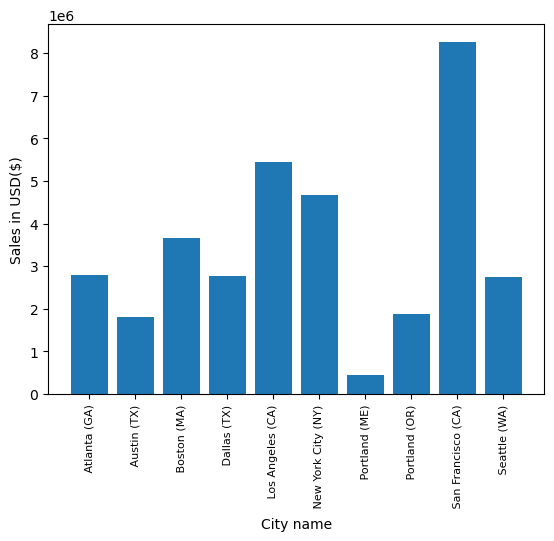

In [169]:
##this function help re-arrange it to be grouped according to how they are in the dataset it doesnt make it arrange all randomly##cities = [city for city, df in all_data.groupby('City')]
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likehood of customer's buying a product?

##### convert order date into day / time object

In [170]:
all_data['Order Date'] =pd.to_datetime(all_data['Order Date'])
all_data

Order ID                 Product  Quantity Ordered  Price Each  \
0        295665      Macbook Pro Laptop                 1     1700.00   
1        295666      LG Washing Machine                 1      600.00   
2        295667    USB-C Charging Cable                 1       11.95   
3        295668        27in FHD Monitor                 1      149.99   
4        295669    USB-C Charging Cable                 1       11.95   
...         ...                     ...               ...         ...   
186845   222905  AAA Batteries (4-pack)                 1        2.99   
186846   222906        27in FHD Monitor                 1      149.99   
186847   222907    USB-C Charging Cable                 1       11.95   
186848   222908    USB-C Charging Cable                 1       11.95   
186849   222909  AAA Batteries (4-pack)                 1        2.99   

                Order Date                        Purchase Address  Month  \
0      2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1      2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2      2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3      2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4      2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   
...                    ...                                     ...    ...   
186845 2019-06-07 19:02:00           795 Pine St, Boston, MA 02215      6   
186846 2019-06-01 19:29:00   495 North St, New York City, NY 10001      6   
186847 2019-06-22 18:57:00   319 Ridge St, San Francisco, CA 94016      6   
186848 2019-06-26 18:35:00    916 Main St, San Francisco, CA 94016      6   
186849 2019-06-25 14:33:00          209 11th St, Atlanta, GA 30301      6   

          Sales                 City  
0       1700.00   New York City (NY)  
1        600.00   New York City (NY)  
2         11.95   New York City (NY)  
3        149.99   San Francisco (CA)  
4         11.95         Atlanta (GA)  
...         ...                  ...  
186845     2.99          Boston (MA)  
186846   149.99   New York City (NY)  
186847    11.95   San Francisco (CA)  
186848    11.95   San Francisco (CA)  
186849     2.99         Atlanta (GA)  

[185950 rows x 9 columns]

##### Grabbing the hour and minute column

In [171]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

                  City  Hour  Minute  
0   New York City (NY)     0       1  
1   New York City (NY)     7       3  
2   New York City (NY)    18      21  
3   San Francisco (CA)    15      13  
4         Atlanta (GA)    12      38

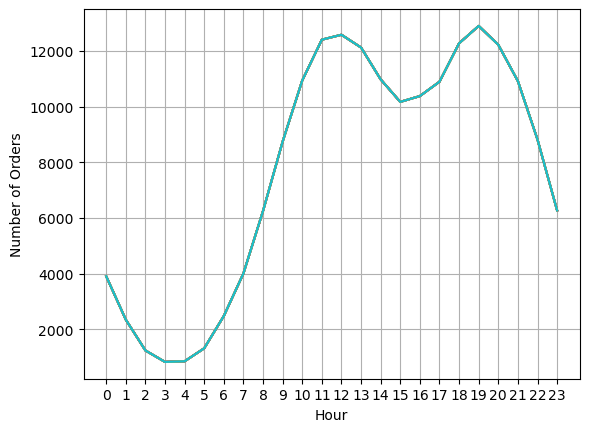

In [172]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())

all_data.groupby(['Hour']).count()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()




#my recommendation is around 11am (11) and 7pm (19)

#### Question 4: What products are most often sold together?

In [173]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
df =df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)

/var/folders/yw/s7bgm2n16zjcst5gwwfbrr4c0000gn/T/ipykernel_67602/1467978613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


Order ID                                            Grouped
16     295681  Google Phone,USB-C Charging Cable,Bose SoundSp...
36     295698               Vareebadd Phone,USB-C Charging Cable
42     295703   AA Batteries (4-pack),Bose SoundSport Headphones
66     295726                    iPhone,Lightning Charging Cable
76     295735   iPhone,Apple Airpods Headphones,Wired Headphones
...       ...                                                ...
2297   297847                    iPhone,Lightning Charging Cable
2345   297894         USB-C Charging Cable,AA Batteries (4-pack)
2347   297895              USB-C Charging Cable,27in FHD Monitor
2398   297945  Vareebadd Phone,USB-C Charging Cable,Bose Soun...
2406   297951      USB-C Charging Cable,Lightning Charging Cable

[100 rows x 2 columns]

In [174]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [175]:
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

                  City  Hour  Minute  
0   New York City (NY)     0       1  
1   New York City (NY)     7       3  
2   New York City (NY)    18      21  
3   San Francisco (CA)    15      13  
4         Atlanta (GA)    12      38

/var/folders/yw/s7bgm2n16zjcst5gwwfbrr4c0000gn/T/ipykernel_67602/1582663422.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


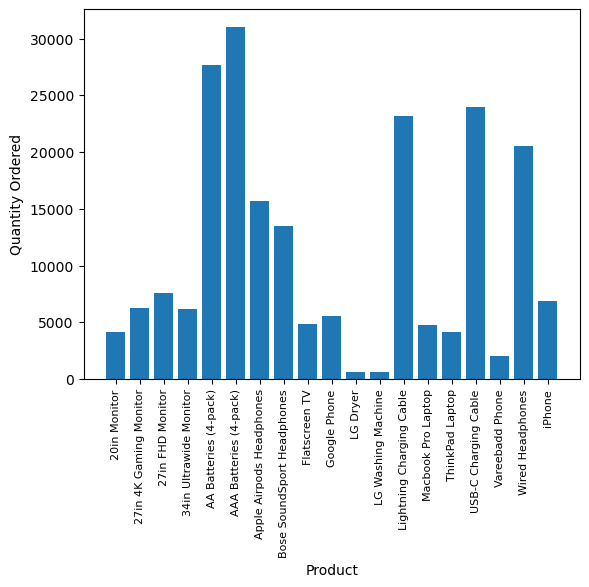

In [180]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size=8)
plt.show()

/var/folders/yw/s7bgm2n16zjcst5gwwfbrr4c0000gn/T/ipykernel_67602/2109851283.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/var/folders/yw/s7bgm2n16zjcst5gwwfbrr4c0000gn/T/ipykernel_67602/2109851283.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=8)


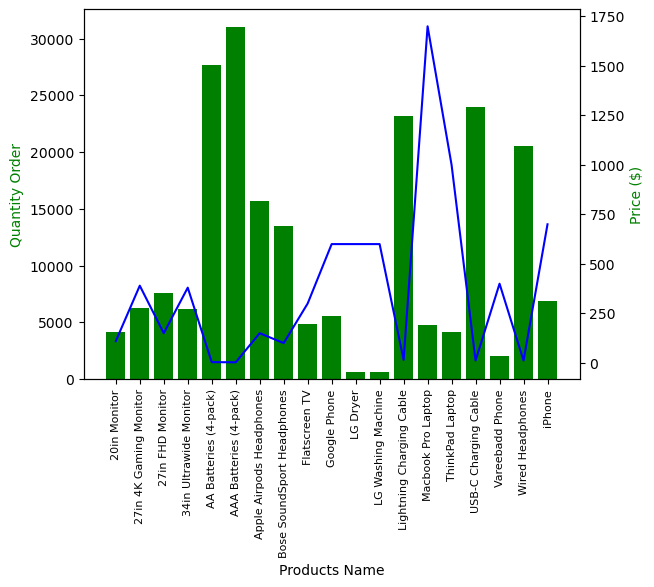

In [192]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products Name')
ax1.set_ylabel('Quantity Order', color='g')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)
plt.show()